# Implementation Of The Finite Difference Scheme For The Diffusion Equation

## Algorithm

The system is

$$
    \newcommand{\qty}[1]
    {
        \left({#1}\right)
    }
    \newcommand{\qtys}[1]
    {
        \left[{#1}\right]
    }
$$     

\begin{align}
    \frac{\partial C_+}{\partial \tau} &= \mathcal{D}_+\qty{\nabla^2 C_+ - \nabla\qty{C_+ \nabla \Psi}}, \\
    \frac{\partial C_-}{\partial \tau} &= \mathcal{D}_-\qty{\nabla^2 C_- + \nabla\qty{C_- \nabla \Psi}}, \\
    \nabla^2 \Psi &= \frac{\qty{z\mathcal{F}}^2}{\epsilon RT}\qty{C_- - C_+}
\end{align}

With boundary conditions

\begin{align}
    J_+(x = 0) &= -\mathcal{D}_+\qty{\frac{\partial C_+}{\partial x}\bigg|_{x= 0} - C_+ \nabla\Psi}= 0\\
    J_-(x = 0) &= -\mathcal{D}_-\qty{\frac{\partial C_-}{\partial x}\bigg|_{x= 0} + C_- \nabla\Psi}  = 0\\
    C_+(\delta) = C_b\\
    C_-(\delta) = C_b\\
    \Psi(x = 0) &= \frac{z\mathcal{F}}{RT} \phi(x=0)\\
    \Psi(x = \delta) &= 0
\end{align}



# Descrete equations

For each species ($s = \pm$) we have

\begin{align}
    C_s^{n+1, k} =& C_s^{n,k} \qty{1 - 2 \alpha + s \alpha \qty{\Psi^{n, k} - \Psi^{n, k-1}}} + \alpha C_s^{n, k+1} \qty{1 - s \qty{\Psi^{n,k+1} - \Psi^{n,k}}} + \alpha C_s^{n,k-1}.\\
    \Psi^{n+1, k+1} - 2\Psi^{n+1,k} + \Psi^{n+1, k-1} =& C_+^{n+1, k} - C_-^{n+1, k}
\end{align}






### Descritizing boundary conditions

Boundary conditions are drawn from the flux and can be found to be (in descrite form)

\begin{align}
C_s^{n+1, 0} &= \gamma_s C_s^{n+1, 1},\\
C_s^{n+1, M} &= C_b,\\
\Psi^{n+1, 0} &= \Psi_0,\\
\Psi^{n+1, M} &= 0\\
\Psi^{n+1, M} &= \Psi^{n+1, M-1} 
\end{align}


with

\begin{align}
\gamma_s &= \frac{1}{1 + s\qty{\Psi^{n+1, 1}-\Psi^{n+1,0}} }
\end{align}

This equations yield the following boundary equations

$$ k=1 $$

\begin{align}
    C_s^{n+1, 1} =& C_s^{n,1} \qty{1 - 2 \alpha + \alpha \gamma_s + s \alpha \qty{\Psi^{n, 1} - \Psi^{n, 0}}} + \alpha C_s^{n, 2} \qty{1 - s \qty{\Psi^{n,2} - \Psi^{n,1}}}.\\
    \Psi^{n+1, 2} - 2\Psi^{n+1,1} + \Psi^{n+1, 0} =& C_+^{n+1, 1} - C_-^{n+1, 1}
\end{align}


$$ k = m-1$$

\begin{align}
    C_s^{n+1, m-1} =& C_s^{n,m-1} \qty{1 - 2 \alpha + s \alpha \qty{\Psi^{n, m-1} - \Psi^{n, m-2}}} + \alpha C_s^{n, m} \qty{1 - s \qty{\Psi^{n,m} - \Psi^{n,m-1}}}.\\
    \Psi^{n+1, 2} - 2\Psi^{n+1,1} + \Psi^{n+1, 0} =& C_+^{n+1, 1} - C_-^{n+1, 1} 
\end{align}


### Matrix equations

We can write the system as follows

\begin{align}
\underline{C_s^{n+1}} = (\bf{A} + s\alpha\bf{B}(\Psi^{n}) ) \cdot \underline{C_s^{n}}\\
\bf{D} \underline{\Psi}^{n+1} = \Delta \xi ^2\qty{\underline{C_-}^{n+1} - \underline{C_+}^{n+1}}- \underline{b}
\end{align}


where

\begin{align}
A = \begin{bmatrix}
    1 - 2 \alpha + \alpha \gamma_s   &  \alpha   & 0  &   \cdots & 0   &   0   &   0   &   0 \\
    \alpha    &   1 - 2 \alpha       &  \alpha   & 0  & \cdots   & 0   &   0   &   0 \\
    0         & \alpha               &  1 - 2 \alpha  & \alpha   & \cdots   &   0   &   0   &   0 \\
    \vdots    &  \vdots              &\vdots          &  \vdots  & \vdots   &\vdots & \vdots & \vdots \\ 
    0         &  0                   &  \cdots        &  0       &  \alpha    &  1-2\alpha &    \alpha   &    0 \\
0         &  0                   &  \cdots        &  0           &  0         &     0      &  \alpha    &  1-2\alpha 
\end{bmatrix}
\end{align}

,

\begin{align}
B(\Psi) = \begin{bmatrix}
    \qty{\Psi^{n,1} - \Psi^{n, 0}}   &  -\qty{\Psi^{n,2} - \Psi^{n, 1}}   & 0  &   \cdots & 0   &   0   &   0   &   0 \\
    0                                &  \qty{\Psi^{n,1} - \Psi^{n, 0}}    & -\qty{\Psi^{n,2} - \Psi^{n, 1}}   & 0  & \cdots   & 0   &   0   &   0 \\
    0         & 0                    &  \qty{\Psi^{n,2} - \Psi^{n, 1}}    & -\qty{\Psi^{n,3} - \Psi^{n, 2}} & \cdots    &   0   &   0 \\
    \vdots    &  \vdots              &\vdots          &  \vdots  & \vdots   &\vdots & \vdots & \vdots \\ 
    0         &  0                   &  \cdots        &  0       &  0         &  0         & \qty{\Psi^{n,M-2} - \Psi^{n, M-3}}   & -\qty{\Psi^{n,M-1} - \Psi^{n, M-2}} \\
0         &  0                   &  \cdots        &  0           &  0         &     0      &  0    &  \qty{\Psi^{n,M-1} - \Psi^{n, M-2}}
\end{bmatrix}
\end{align}

and
\begin{align}
D = \begin{bmatrix}
    -2   &  1   & 0  &   \cdots & 0   &   0   &   0   &   0 \\
    1    &  -2    & 1   & 0  & \cdots   & 0   &   0   &   0 \\
    0         & 1                    &  -2   & 1 & \cdots    &   0   &   0 \\
    \vdots    &  \vdots              &\vdots          &  \vdots  & \vdots   &\vdots & \vdots & \vdots \\ 
    0         &  0                   &  \cdots        &  0       &  0         &  0         & \qty{\Psi^{n,M-2} - \Psi^{n, M-3}}   & -\qty{\Psi^{n,M-1} - \Psi^{n, M-2}} \\
0         &  0                   &  \cdots        &  0           &  0         &     0      &  1    &  -1
\end{bmatrix}.
\end{align}

\begin{align}
    b = \begin{bmatrix}
        \Psi_0\\
        0\\
        \vdots\\
        0
    \end{bmatrix}
\end{align}

We define matrix $\bf{Z}$ as

\begin{align}
    Z_s = A_s + s\alpha B(\underline{Psi})
\end{align}

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

# Define grid parameters
N = 10000
M = 50
xi = np.linspace(0,1, M)
tau = np.linspace(0,1, N) #shape is N+1
dtau = 1/(N)  # N Partitions
dxi = 1/(M) # N Partitions 
a = dtau / (dxi ** 2)

#Define Model Parameters
params = { 
    'bulkConcentration': 100, 
    'diffusionCoefficient': 1.07e-9, 
    'laminarFlowRegion': 1e-10, 
    'reactionRate': 1e-1,
    "z": 2,
    "e": 1.60217662E-19,
    "kb": 1.38064852E-23,
    "T": 300,
    "Na": 6.02E23,
    "Fa": 96485.3329,#Na * e
    "R": 8.314472,
    "V0": -0.15,
    "D1": 1.05,
    "D2":  0.76,
    "Cb": 100,
    #d = 1.544E-6
    "epsilon": 80.9 * 8.85418782E-12,
    "length": 20.0
}

Cb = params['bulkConcentration']
D = params['diffusionCoefficient']
d = params['laminarFlowRegion']
kf = params['reactionRate']
z = params['z']
F = params['Fa']
R = params['R']
T = params['T']
epsilon = params['epsilon']
kappa =  ( ( z * F  ) ** 2 * Cb ) / ( epsilon * R * T ) 

def Model():
    
    #Set up initial/border conditions for \rho 
    rho1 = np.zeros([N, M])
    rho2 = np.zeros([N, M])
    rho1[0, :] = np.zeros(M)
    rho1[0, -1] = 1
    rho2[0, :] = np.zeros(M)
    rho2[0, -1] = 1

    #vectorize boundary condition for Psi
    Psi0 = z * F / ( R * T ) * params['V0']
    b = np.zeros(M-2)
    b[0] = Psi0
    Psi = np.zeros([N, M])
    #Initial Condition: linear profile
    Psi[0, :] = Psi0 * (np.ones(M) - xi)

    #"Interaction Matrix B for n = 0"
    B = diags(np.array([ Psi0 * np.ones(M-2),  -Psi0 * np.ones(M-3)]), [0, 1], shape=(M-2, M-2)).toarray() #interaction with Psi matrix
    
    #Define D matrix (Psi descretized system of equations)
    D = diags(np.array([ np.ones(M-3), -2 * np.ones(M-2), np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()
    D[-1, -1] = -1
    D_inv = np.asarray(np.linalg.inv(D))

    
    #Starting iteration
    for n in range(0, N-1):

        #Compute boundary condition for C_+ and Define Matrix A and Z_+ = A_+ + a * B_+
        g_p = 1 / ( 1 - (Psi[n, 1] - Psi0)  )
        di_ = ( 1 - 2 * a ) * np.ones(M-2) #Diagonal vector for tri-diagonal matrix A1
        di_[0] = ( 1 - 2 * a + g_p * a ) 
        A1 = diags(np.array([ a * np.ones(M-3), di_, a * np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()
        Z1 = A1 + a * B
        
        #Compute boundary condition for C_- and Define Matrix A_- and Z_- = A_- - a * B_-
        g_m = 1 / ( 1 + (Psi[n, 1] - Psi0))
        di_[0] = ( 1 - 2 * a + g_m * a )  #Boundary condition for second electrolyte (the rest of vector di stays the same)
        A2 = diags(np.array([a * np.ones(M-3), di_, a * np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()
        Z2 = A1 - a * B
        
        #Compute next time-step for C_+ (rho1)
        rho1[n+1, 1:M-1] = np.matmul( Z1, rho1[n, 1:M-1] )
        rho1[n+1, 0] = g_p * rho1[n+1, 1]
        rho1[n+1, -1] = Cb
        
        #Compute next time-step for C_- (rho2)
        rho2[n+1, 1:M-1] = np.matmul( Z2, rho2[n, 1:M-1] )
        rho2[n+1, 0] =  g_m * rho2[n+1, 1]
        rho2[n+1, -1] = Cb
        
        ##UPDATE PSI
        Psi[n+1, 1:M-1] = np.matmul( D_inv, rho2[n+1, 1:M-1] - rho1[n+1, 1:M-1] - b )
        Psi[n+1, 0] = Psi0
        Psi[n+1, -1] = Psi[n+1, -2]
    
        ##UPDATE B MATRIX WITH NEW PSI
        B = diags(np.array([ Psi[n+1, 1:M-1] - Psi[n+1, :M-2],  Psi[n+1, 2:M] - Psi[n+1, 1:M-1]]), [0, 1], shape=(M-2, M-2)).toarray() #interaction with Psi matrix
    
    #Once done, return the N X M Matrixes rho1, rho2 and Psi
    return  rho1, rho2, Psi

#Cm is the imported analytical solution
def remove_points(A):
    A = np.delete(A, [1, 2, 3])
    for i in range(0,int(len(A)/4)):
        index = i+4
        A = np.delete(A, [index-2, index-1, index])
    return A

C1, C2, Psi = Model()

In [2]:
print(a)

0.25


## Numeric solution for consumtion reaction rate

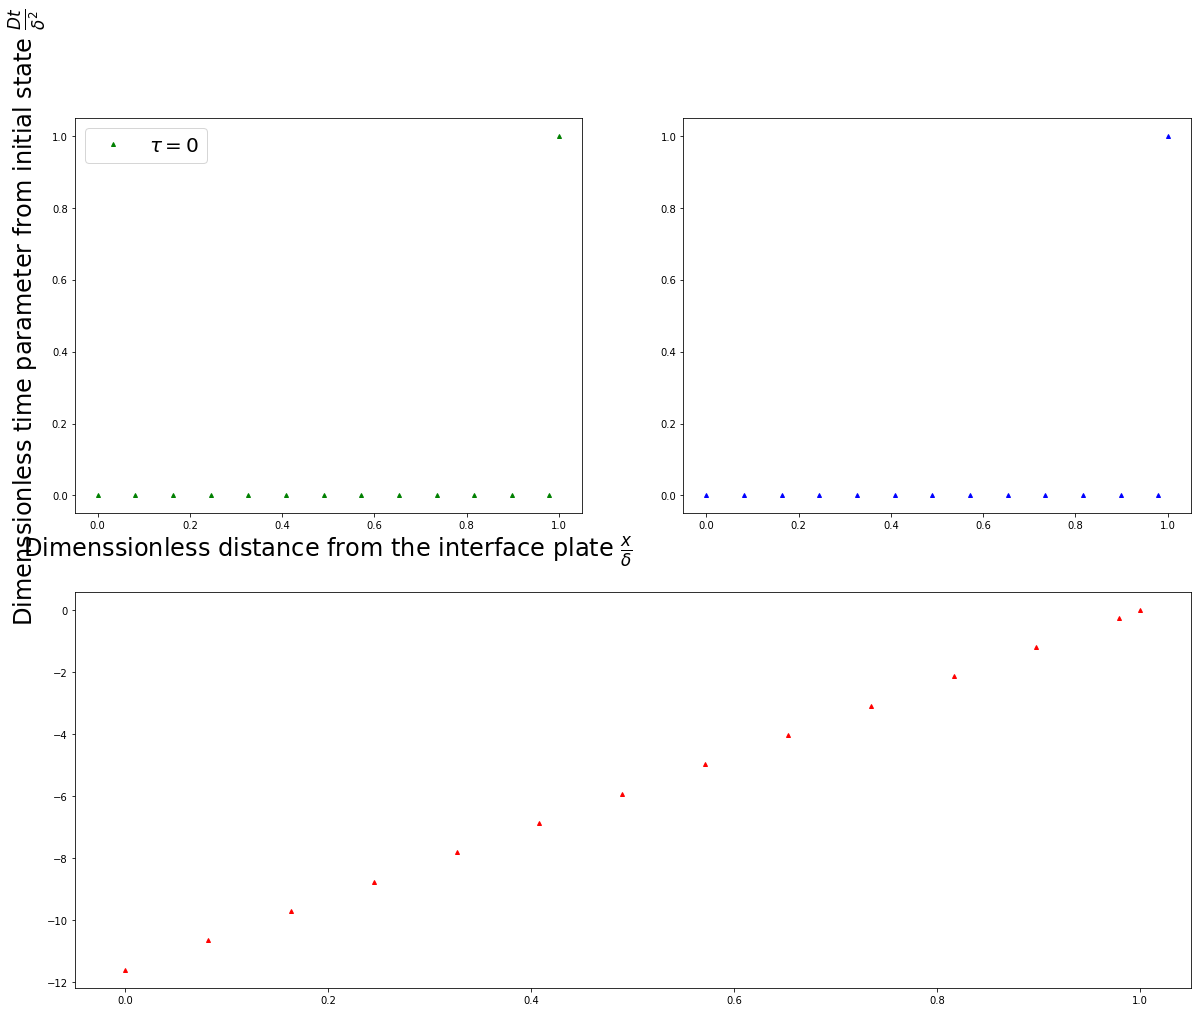

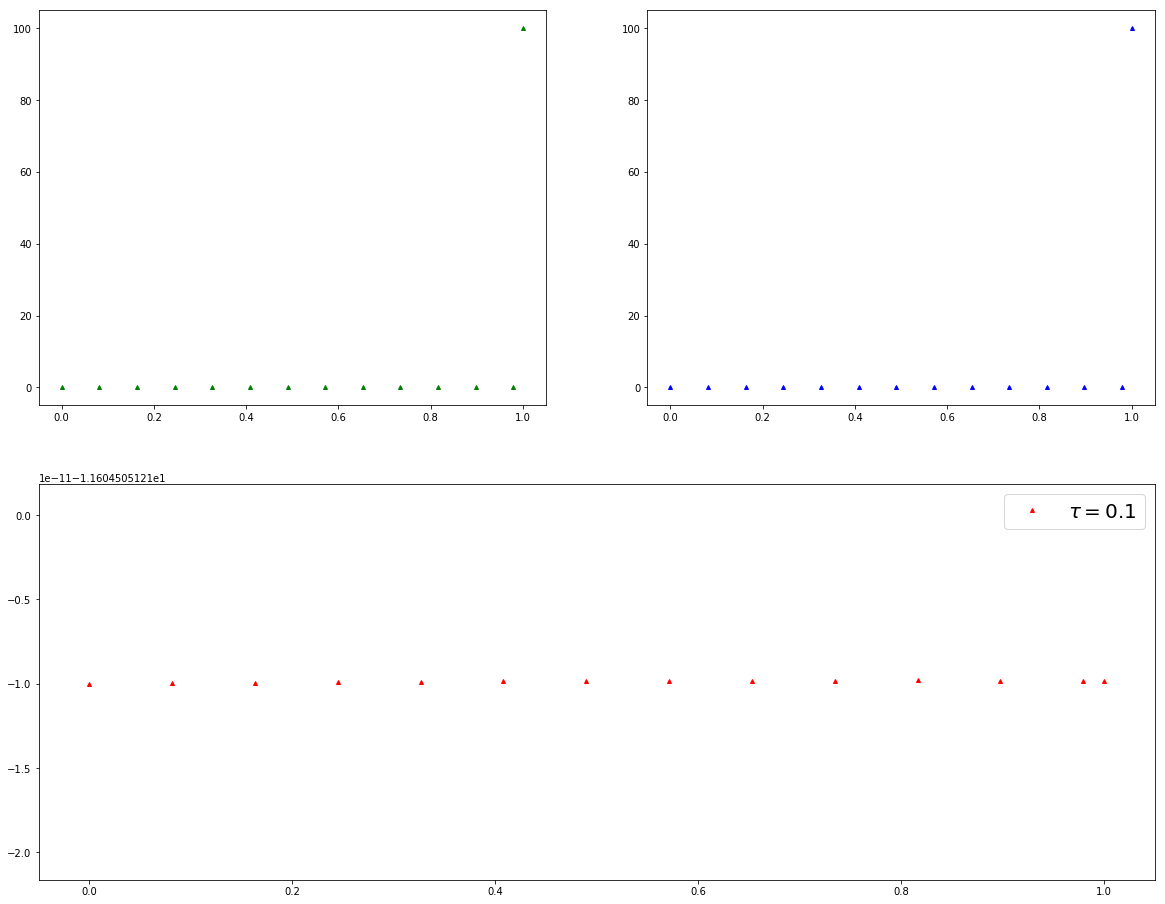

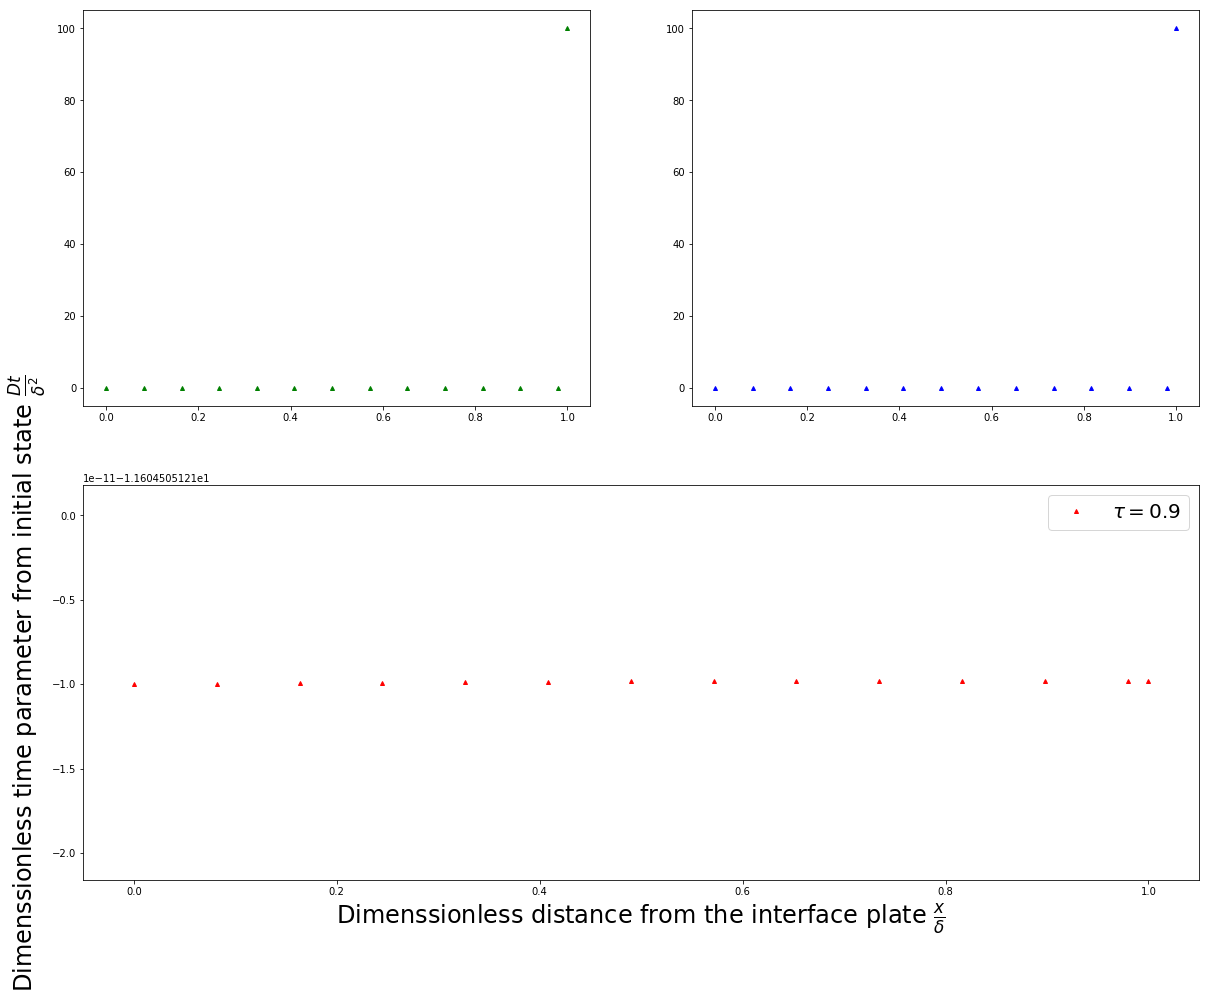

In [4]:
# import matplotlib.pyplot as plt
import analyticDiffusionLangmuirBC

Cm = analyticDiffusionLangmuirBC.C_an
mw = 4
fs = 24
xi2 = remove_points(xi) # this is done to avoid cluttering of numeric points over the analytic solution
fig1 = plt.figure(figsize=(20,16))
t = 0
n = int(t/dtau)

plt.title('Comparing Numeric Solution To The Diffusion Reaction And Analytic Solution \n To The Diffusion-Only Problem', fontsize=fs, fontweight='bold')
plt.subplot(212)
plt.plot(xi2, remove_points(Psi[n]), 'r^', markersize=mw, label=r'$\tau='+str(t)+'$')
plt.subplot(222)
plt.plot(xi2, remove_points(C1[n]), 'b^', markersize=mw, label=r'$\tau='+str(t)+'$')
plt.subplot(221)
plt.plot(xi2, remove_points(C2[n]), 'g^', markersize=mw, label=r'$\tau='+str(t)+'$')
plt.xlabel(r'Dimenssionless distance from the interface plate $\frac{x}{\delta}$', fontsize=fs)
plt.ylabel(r'Dimenssionless time parameter from initial state $\frac{Dt}{\delta^2}$', fontsize=fs)
#plt.text(0.9, 40, r'Reaction Rate', fontsize = 14, color = 'black')
#plt.text(0.9, 37, r'$r = - 1.5 \times 10 \frac{A}{m^2}$', fontsize = 14, color = 'black')
plt.legend(fontsize = fs-4)
plt.savefig('../../../img/concentration-diffusion-reaction-comparison.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')
plt.show()

t = 0.1
n = int(t/dtau)
fig2 = plt.figure(figsize=(20,16))
plt.subplot(221)
plt.plot(xi2, remove_points(C2[n]), 'g^', markersize=mw, label=r'$\tau='+str(t)+'$')
plt.subplot(222)
plt.plot(xi2, remove_points(C1[n]), 'b^', markersize=mw, label=r'$\tau='+str(t)+'$')
plt.subplot(212)
plt.plot(xi2, remove_points(Psi[n]), 'r^', markersize=mw, label=r'$\tau='+str(t)+'$')
#plt.xlabel(r'Dimenssionless distance from the interface plate $\frac{x}{\delta}$', fontsize=fs)
#plt.ylabel(r'Dimenssionless time parameter from initial state $\frac{Dt}{\delta^2}$', fontsize=fs)
#plt.text(0.9, 40, r'Reaction Rate', fontsize = 14, color = 'black')
#plt.text(0.9, 37, r'$r = - 1.5 \times 10 \frac{A}{m^2}$', fontsize = 14, color = 'black')
plt.legend(fontsize = fs-4)
plt.savefig('../../../img/concentration-diffusion-reaction-comparison.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')
plt.show()

t = 0.9
n = int(t/dtau)
fig3 = plt.figure(figsize=(20,16))
plt.subplot(221)
plt.plot(xi2, remove_points(C2[n]), 'g^', markersize=mw, label=r'$\tau='+str(t)+'$')
plt.subplot(222)
plt.plot(xi2, remove_points(C1[n]), 'b^', markersize=mw, label=r'$\tau='+str(t)+'$')
plt.subplot(212)
plt.plot(xi2, remove_points(Psi[n]), 'r^', markersize=mw, label=r'$\tau='+str(t)+'$')
plt.xlabel(r'Dimenssionless distance from the interface plate $\frac{x}{\delta}$', fontsize=fs)
plt.ylabel(r'Dimenssionless time parameter from initial state $\frac{Dt}{\delta^2}$', fontsize=fs)
#plt.text(0.9, 40, r'Reaction Rate', fontsize = 14, color = 'black')
#plt.text(0.9, 37, r'$r = - 1.5 \times 10 \frac{A}{m^2}$', fontsize = 14, color = 'black')
plt.legend(fontsize = fs-4)
plt.savefig('../../../img/concentration-diffusion-reaction-comparison.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')
plt.show()